### Validation
For validating the collective cell structure model, we analyzed our simulated results as follows:

First, we import the necessary packages for analyses:

In [1]:
# import the necessary and needed packages for analyses
import glob
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random, pickle
import os
from matplotlib.patches import Patch, Rectangle
import pandas as pd

### Experimental data extracted from Chen et al, 2020 using Plotdigitizer

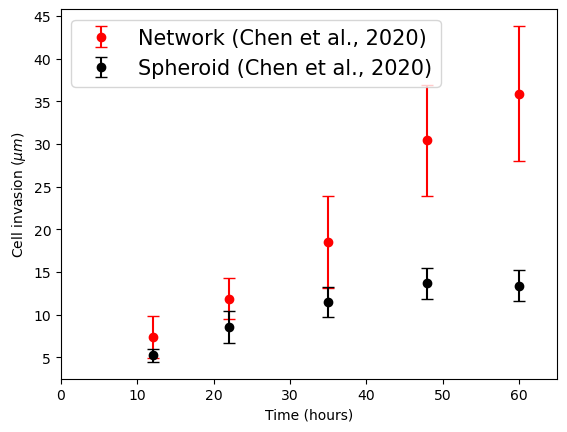

In [2]:
# The data points are extracted from the images using plot digitizer
# Chen Network data
network_days = [12, 22, 35, 48, 60]
network_conc = [7.41, 11.88, 18.53, 30.42, 35.91]
network_error = [2.43, 2.43, 5.37, 6.52, 7.92]
plt.errorbar(network_days, network_conc, yerr=network_error, color = 'red', fmt='o',capsize=4, label='Network (Chen et al., 2020)')

# Chen Spheroid data
spheroid_days = [12, 22, 35, 48, 60]
spheroid_conc = [5.24, 8.56, 11.50, 13.67, 13.42]
spheroid_error = [0.77, 1.92, 1.79, 1.79, 1.79]

# plot the experimental data
plt.errorbar(spheroid_days, spheroid_conc, yerr=spheroid_error, color = 'black', fmt='o',capsize=4, label='Spheroid (Chen et al., 2020)')
plt.xlabel('Time (hours)')
plt.ylabel('Cell invasion ($\mu m$)')
plt.xlim(0, 65)
plt.legend(loc='best', fontsize="15")
plt.savefig("cell_structure_experiment_data.png", dpi = 500, bbox_inches='tight')
plt.show()

### Max cell invasion for experimental data in Chen et al. after 2.5 days

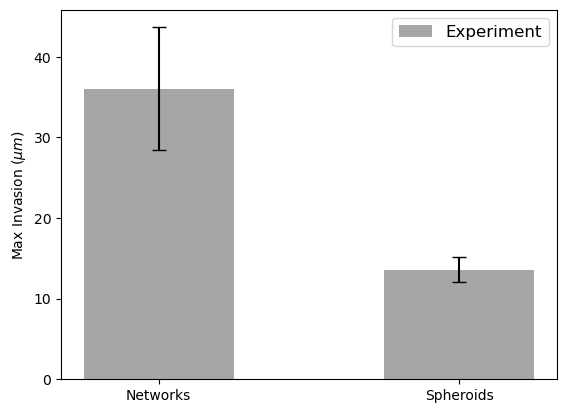

In [3]:
# Provided data (Experiment) using plot digitizer for extraction
labels = ['Networks', 'Spheroids']
experiment_means = [36.03, 13.58]
experiment_errors = [7.63, 1.56]

# Bar positions
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

# Create bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(x, experiment_means, width, label='Experiment', yerr=experiment_errors, capsize=5, color='grey', alpha=0.7)


# Add labels 
ax.set_ylabel('Max Invasion ($\mu m$)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best', fontsize="12")

# Save and show the plot
plt.savefig("experiment_max_invasion.png", dpi=500, bbox_inches='tight')

### Circularity after day 7

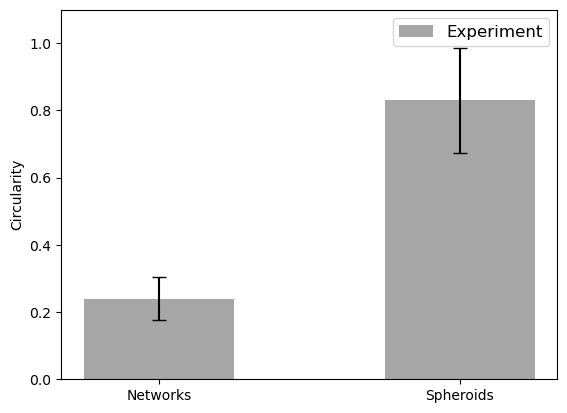

In [4]:
# Provided data (Experiment) through plot digitizer
labels = ['Networks', 'Spheroids']
experiment_means = [0.24, 0.83]
experiment_errors = [0.063, 0.156]

# Bar positions
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

# Create bar chart
fig, ax = plt.subplots()
#rects1 = ax.bar(x, experiment_means, width, label='Experiment', capsize=5, color='grey', alpha=0.7)
rects1 = ax.bar(x, experiment_means, width, label='Experiment', yerr=experiment_errors, capsize=5, color='grey', alpha=0.7)


# Add labels
ax.set_ylabel('Circularity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0,1.1)
ax.legend(loc='best', fontsize="12")

# Save and show the plot
plt.savefig("experiment_circularity.png", dpi=500, bbox_inches='tight')

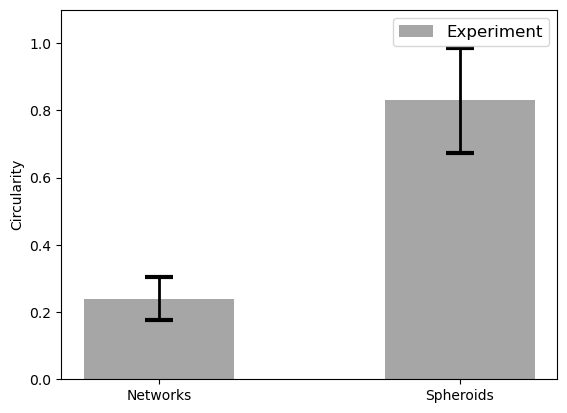

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data (Experiment) through plot digitizer
labels = ['Networks', 'Spheroids']
experiment_means = [0.24, 0.83]
experiment_errors = [0.063, 0.156]

# Bar positions
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

# Create bar chart with thick error bars and thick horizontal caps
fig, ax = plt.subplots()
rects1 = ax.bar(
    x, 
    experiment_means, 
    width, 
    label='Experiment', 
    yerr=experiment_errors, 
    capsize=10,  # Length of the cap
    color='grey', 
    alpha=0.7, 
    error_kw={'elinewidth': 2, 'capthick': 3}  # Thickness of error bar and caps
)

# Add labels
ax.set_ylabel('Circularity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend(loc='best', fontsize="12")

# Save and show the plot
plt.savefig("experiment_circularity.png", dpi=500, bbox_inches='tight')
plt.show()


### Networks and Spheroids data result with 5th - 95th percentile range

#### Loading cell data

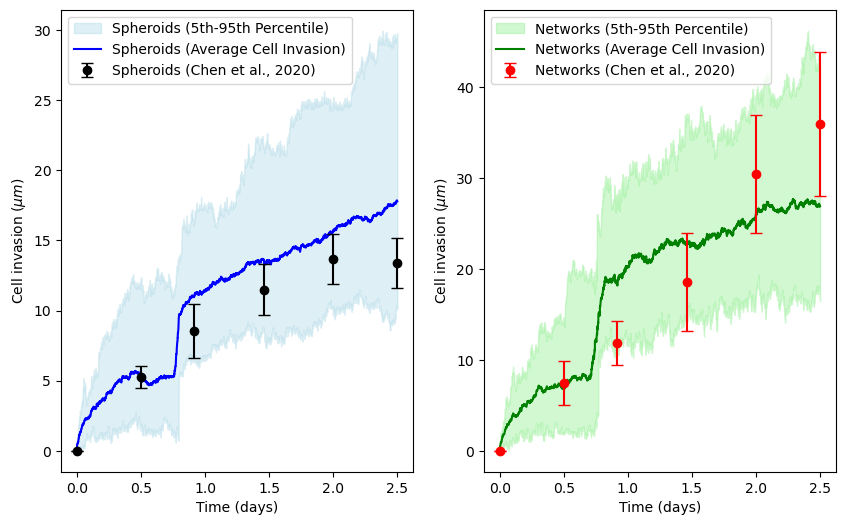

In [6]:
# Function to read and process data from a given folder
def read_and_process_data(folder_path):
    data_list = []

    # Loop through each CSV file and read the data
    # We have 20 replicas for summary statistics and named each celldata1, celldata2,..., celldata20
    for i in range(1, 21):
        file_path = os.path.join(folder_path, f'celldata{i}.csv')
        data = pd.read_csv(file_path)
        data_list.append(data)

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Convert MCS to days (1000 mcs = 1 day) based on experimental setup
    all_data['days'] = all_data['mcs'] / 1000
    

    # Multiply cell_invasion by 2 to convert back to the experimental value
    # each cell is 2 $\mu$ m for 1 pixel in simulation
    all_data['cell_invasion'] *= 2

    # Filter data to include only the first 2.5 days/ 60 hrs to match experiment
    filtered_data = all_data[all_data['days'] <= 2.5]

    # Calculate the average circularity and cell_invasion for each day
    average_data = filtered_data.groupby('days').agg({'circularity': 'mean', 'cell_invasion': 'mean'}).reset_index()

    # Calculate the 5th and 95th percentiles for circularity and cell_invasion for each day
    percentiles_data = filtered_data.groupby('days').agg({
        'circularity': [lambda x: np.percentile(x, 5), lambda x: np.percentile(x, 95)],
        'cell_invasion': [lambda x: np.percentile(x, 5), lambda x: np.percentile(x, 95)]
    }).reset_index()

    # Rename the columns for clarity
    percentiles_data.columns = ['days', 'circularity_5th', 'circularity_95th', 'cell_invasion_5th', 'cell_invasion_95th']

    return average_data, percentiles_data

# Read and process data from both folders
average_data_ec, percentiles_data_ec = read_and_process_data('ecc_data1')
average_data_sp, percentiles_data_sp = read_and_process_data('spp_data')

# Experimental data (converted from hours to days)
network_days = [0, 12, 22, 35, 48, 60]  # in hours
network_days = [x / 24 for x in network_days]  # convert to days
network_conc = [0, 7.41, 11.88, 18.53, 30.42, 35.91]  # Added origin point
network_error = [0, 2.43, 2.43, 5.37, 6.52, 7.92]  # Added origin point

spheroid_days = [0, 12, 22, 35, 48, 60]  # in hours
spheroid_days = [x / 24 for x in spheroid_days]  # convert to days
spheroid_conc = [0, 5.24, 8.56, 11.50, 13.67, 13.42]  # Added origin point
spheroid_error = [0, 0.77, 1.92, 1.79, 1.79, 1.79]  # Added origin point

# Plotting of the images
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
# Plot cell_invasion percentiles for both spheroid

ax[0].fill_between(percentiles_data_sp['days'], percentiles_data_sp['cell_invasion_5th'], percentiles_data_sp['cell_invasion_95th'], color='lightblue', alpha=0.4, label='Spheroids (5th-95th Percentile)')
ax[0].plot(average_data_sp['days'], average_data_sp['cell_invasion'], label='Spheroids (Average Cell Invasion)', color='blue')
ax[0].errorbar(spheroid_days, spheroid_conc, yerr=spheroid_error, color='black', fmt='o', capsize=4, label='Spheroids (Chen et al., 2020)')
#ax[0].set_title('Cell Invasion Percentiles and Average (First 2.5 Days) for Spheroids Phenotype')
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('Cell invasion ($ \mu m$)')
ax[0].legend(loc=2)

# Plot cell_invasion percentiles for both network
ax[1].fill_between(percentiles_data_ec['days'], percentiles_data_ec['cell_invasion_5th'], percentiles_data_ec['cell_invasion_95th'], color='lightgreen', alpha=0.4, label='Networks (5th-95th Percentile)')
ax[1].plot(average_data_ec['days'], average_data_ec['cell_invasion'], label='Networks (Average Cell Invasion)', color='green')
ax[1].errorbar(network_days, network_conc, yerr=network_error, color='red', fmt='o', capsize=4, label='Networks (Chen et al., 2020)')
#ax[1].set_title('Cell Invasion Percentiles and Average (First 2.5 Days) for Networks Phenotype')
ax[1].set_xlabel('Time (days)')
ax[1].set_ylabel('Cell invasion ($ \mu m$)')
ax[1].legend()

plt.savefig("cell_invasion_dyanmics_combined.png", dpi= 500, bbox_inches = "tight")
plt.show();

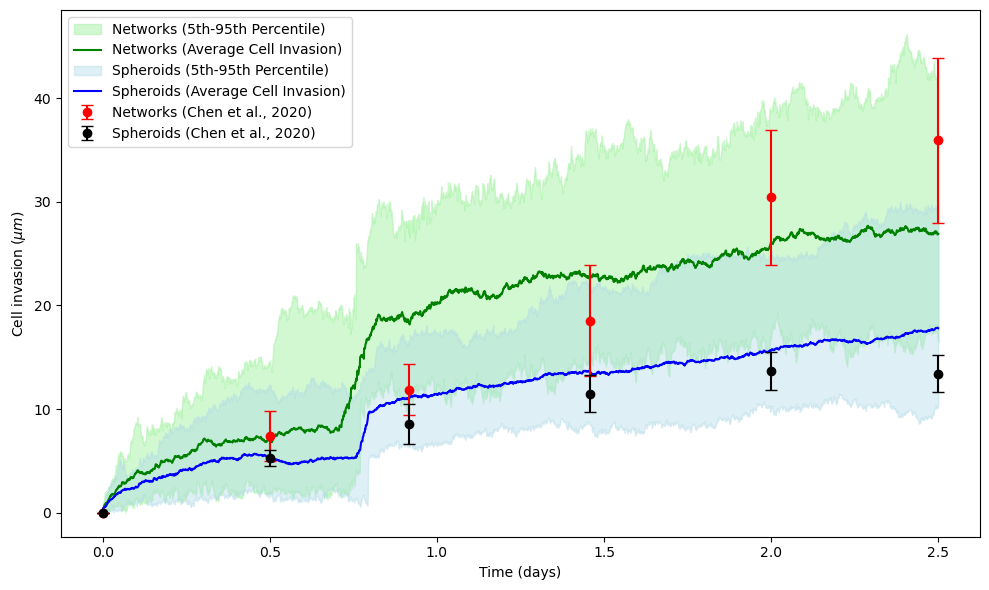

In [7]:
# # Plot cell_invasion percentiles for both datasets

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.fill_between(percentiles_data_ec['days'], percentiles_data_ec['cell_invasion_5th'], percentiles_data_ec['cell_invasion_95th'], color='lightgreen', alpha=0.4, label='Networks (5th-95th Percentile)')
ax1.plot(average_data_ec['days'], average_data_ec['cell_invasion'], label='Networks (Average Cell Invasion)', color='green')
ax1.fill_between(percentiles_data_sp['days'], percentiles_data_sp['cell_invasion_5th'], percentiles_data_sp['cell_invasion_95th'], color='lightblue', alpha=0.4, label='Spheroids (5th-95th Percentile)')
ax1.plot(average_data_sp['days'], average_data_sp['cell_invasion'], label='Spheroids (Average Cell Invasion)', color='blue')
ax1.errorbar(network_days, network_conc, yerr=network_error, color='red', fmt='o', capsize=4, label='Networks (Chen et al., 2020)')
ax1.errorbar(spheroid_days, spheroid_conc, yerr=spheroid_error, color='black', fmt='o', capsize=4, label='Spheroids (Chen et al., 2020)')
#ax1.set_title('Cell Invasion Percentiles and Average (First 2.5 Days) for Cell Phenotype')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Cell invasion ($ \mu m$)')
ax1.legend()
plt.tight_layout()
plt.savefig('cell_invasion_combined_plot_net_sphe.png', dpi = 500, bbox_inches='tight')
plt.show()

### Standard deviation

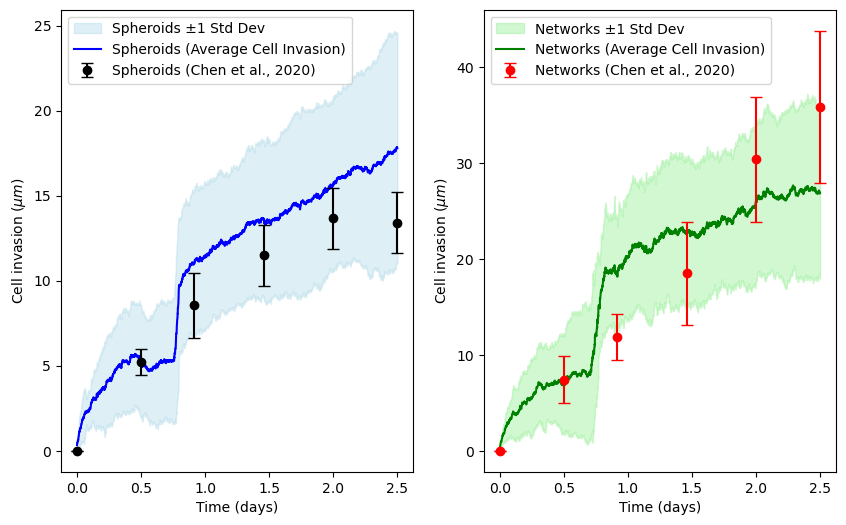

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_data(folder_path):
    data_list = []

    # Loop through each CSV file and read the data
    # We have 20 replicas for summary statistics and named each celldata1, celldata2,..., celldata20
    for i in range(1, 21):
        file_path = os.path.join(folder_path, f'celldata{i}.csv')
        data = pd.read_csv(file_path)
        data_list.append(data)

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Convert MCS to days (1000 mcs = 1 day) based on experimental setup
    all_data['days'] = all_data['mcs'] / 1000

    # Multiply cell_invasion by 2 to convert back to the experimental value
    # each cell is 2 μm for 1 pixel in simulation
    all_data['cell_invasion'] *= 2

    # Filter data to include only the first 2.5 days/60 hrs to match experiment
    filtered_data = all_data[all_data['days'] <= 2.5]

    # Calculate the average and standard deviation for circularity and cell_invasion for each day
    summary_data = filtered_data.groupby('days').agg({
        'circularity': ['mean', 'std'],
        'cell_invasion': ['mean', 'std']
    }).reset_index()

    # Flatten the column names for clarity
    summary_data.columns = ['days', 'circularity_mean', 'circularity_std', 'cell_invasion_mean', 'cell_invasion_std']

    return summary_data

# Read and process data from both folders
summary_data_ec = read_and_process_data('ecc_data1')
summary_data_sp = read_and_process_data('spp_data')

# Experimental data (converted from hours to days)
network_days = [0, 12, 22, 35, 48, 60]  # in hours
network_days = [x / 24 for x in network_days]  # convert to days
network_conc = [0, 7.41, 11.88, 18.53, 30.42, 35.91]  # Added origin point
network_error = [0, 2.43, 2.43, 5.37, 6.52, 7.92]  # Added origin point

spheroid_days = [0, 12, 22, 35, 48, 60]  # in hours
spheroid_days = [x / 24 for x in spheroid_days]  # convert to days
spheroid_conc = [0, 5.24, 8.56, 11.50, 13.67, 13.42]  # Added origin point
spheroid_error = [0, 0.77, 1.92, 1.79, 1.79, 1.79]  # Added origin point

# Plotting of the images
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Plot cell_invasion with standard deviation error for spheroid
ax[0].fill_between(summary_data_sp['days'], 
                   summary_data_sp['cell_invasion_mean'] - summary_data_sp['cell_invasion_std'], 
                   summary_data_sp['cell_invasion_mean'] + summary_data_sp['cell_invasion_std'], 
                   color='lightblue', alpha=0.4, label='Spheroids ±1 Std Dev')
ax[0].plot(summary_data_sp['days'], summary_data_sp['cell_invasion_mean'], label='Spheroids (Average Cell Invasion)', color='blue')
ax[0].errorbar(spheroid_days, spheroid_conc, yerr=spheroid_error, color='black', fmt='o', capsize=4, label='Spheroids (Chen et al., 2020)')
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('Cell invasion ($ \mu m$)')
ax[0].legend(loc=2)

# Plot cell_invasion with standard deviation error for network
ax[1].fill_between(summary_data_ec['days'], 
                   summary_data_ec['cell_invasion_mean'] - summary_data_ec['cell_invasion_std'], 
                   summary_data_ec['cell_invasion_mean'] + summary_data_ec['cell_invasion_std'], 
                   color='lightgreen', alpha=0.4, label='Networks ±1 Std Dev')
ax[1].plot(summary_data_ec['days'], summary_data_ec['cell_invasion_mean'], label='Networks (Average Cell Invasion)', color='green')
ax[1].errorbar(network_days, network_conc, yerr=network_error, color='red', fmt='o', capsize=4, label='Networks (Chen et al., 2020)')
ax[1].set_xlabel('Time (days)')
ax[1].set_ylabel('Cell invasion ($ \mu m$)')
ax[1].legend()

plt.savefig("cell_invasion_dynamics_combined_std.png", dpi=500, bbox_inches="tight")
plt.show();


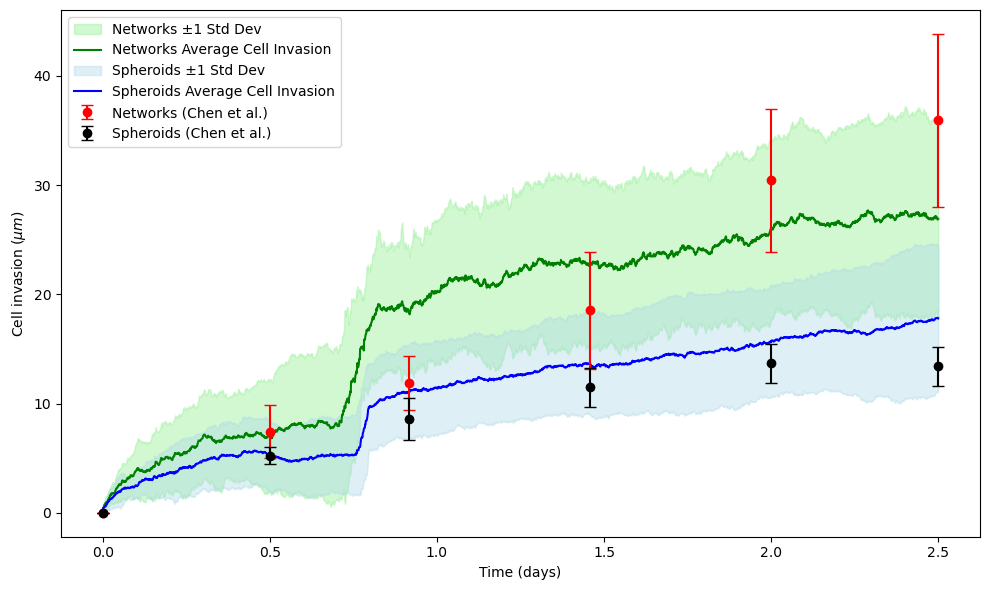

In [9]:
fig1, ax1 = plt.subplots(figsize=(10, 6))

# Fill between ±1 standard deviation for Networks
ax1.fill_between(summary_data_ec['days'], 
                 summary_data_ec['cell_invasion_mean'] - summary_data_ec['cell_invasion_std'], 
                 summary_data_ec['cell_invasion_mean'] + summary_data_ec['cell_invasion_std'], 
                 color='lightgreen', alpha=0.4, label='Networks ±1 Std Dev')

# Plot the average cell invasion for Networks
ax1.plot(summary_data_ec['days'], summary_data_ec['cell_invasion_mean'], 
         label='Networks Average Cell Invasion', color='green')

# Fill between ±1 standard deviation for Spheroids
ax1.fill_between(summary_data_sp['days'], 
                 summary_data_sp['cell_invasion_mean'] - summary_data_sp['cell_invasion_std'], 
                 summary_data_sp['cell_invasion_mean'] + summary_data_sp['cell_invasion_std'], 
                 color='lightblue', alpha=0.4, label='Spheroids ±1 Std Dev')

# Plot the average cell invasion for Spheroids
ax1.plot(summary_data_sp['days'], summary_data_sp['cell_invasion_mean'], 
         label='Spheroids Average Cell Invasion', color='blue')

# Add error bars for the experimental data
ax1.errorbar(network_days, network_conc, yerr=network_error, color='red', fmt='o', capsize=4, label='Networks (Chen et al.)')
ax1.errorbar(spheroid_days, spheroid_conc, yerr=spheroid_error, color='black', fmt='o', capsize=4, label='Spheroids (Chen et al.)')

# Set plot labels and legend
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Cell invasion ($ \mu m$)')
ax1.legend()
plt.tight_layout()

# Save the figure
plt.savefig('cell_invasion_combined_plot_net_sphe_std.png', dpi=500, bbox_inches='tight')
plt.show()

### Max Invasion experimental results compared with simulated results with percentile

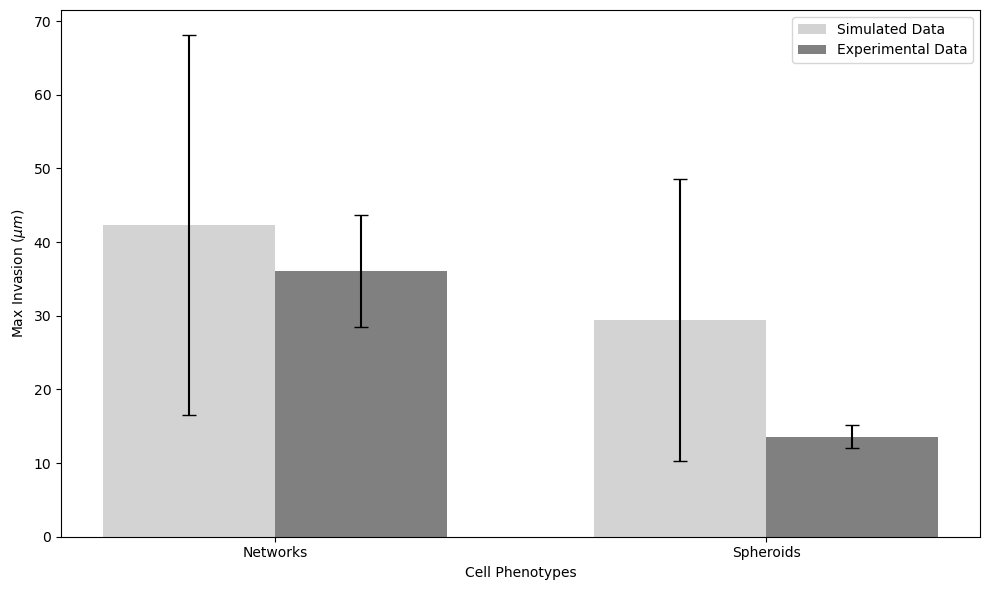

In [10]:
# Function to read and process data from a given folder
def read_and_process_cell_invasion(folder_path):
    data_list = []

    # Loop through each CSV file and read the data
    for i in range(1, 21):
        file_path = os.path.join(folder_path, f'celldata{i}.csv')
        data = pd.read_csv(file_path)
        data_list.append(data)

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Convert mcs to hours (1000 mcs = 24 hours, so 1 mcs = 0.024 hours)
    all_data['hours'] = all_data['mcs'] * 0.024

    # Multiply cell_invasion by 2
    all_data['cell_invasion'] *= 2

    # Calculate the 5th and 95th percentiles for cell_invasion at each hour
    percentile_data = all_data.groupby('hours')['cell_invasion'].agg(
        percentile_5th=lambda x: np.percentile(x, 5),
        percentile_95th=lambda x: np.percentile(x, 95)
    ).reset_index()

    return percentile_data

# Read and process data from both folders
#percentile_data_ec = read_and_process_cell_invasion('ecc_data')
percentile_data_ec = read_and_process_cell_invasion('ecc_data1')
percentile_data_sp = read_and_process_cell_invasion('spp_data')

# Experimental data
labels = ['Networks', 'Spheroids']
experiment_means = [36.03, 13.58]
experiment_errors = [7.63, 1.56]  # These are still experimental errors but will be omitted from the bar plot

# Filter data for 60 hours
data_at_60_hours_ec = percentile_data_ec[percentile_data_ec['hours'] == 60]
data_at_60_hours_sp = percentile_data_sp[percentile_data_sp['hours'] == 60]

# Prepare data for plotting
def prepare_bar_data(data_ec, data_sp):
    means_ec = data_ec['percentile_95th'].values[0] if not data_ec.empty else 0
    range_ec = means_ec - data_ec['percentile_5th'].values[0] if not data_ec.empty else 0
    means_sp = data_sp['percentile_95th'].values[0] if not data_sp.empty else 0
    range_sp = means_sp - data_sp['percentile_5th'].values[0] if not data_sp.empty else 0
    return [means_ec, means_sp], [range_ec, range_sp]

# Create bar plot for data at 60 hours
fig, ax = plt.subplots(figsize=(10, 6))

simulated_means_60, simulated_ranges_60 = prepare_bar_data(data_at_60_hours_ec, data_at_60_hours_sp)

bar_width = 0.35
index = np.arange(len(labels))

# Bar plot for simulated data
bars_simulated = ax.bar(index - bar_width / 2, simulated_means_60, bar_width, yerr=simulated_ranges_60, capsize=5, label='Simulated Data', color='lightgray')

# Bar plot for experimental data
bars_experimental = ax.bar(index + bar_width / 2, experiment_means, bar_width, yerr=experiment_errors, capsize=5, color='grey', label='Experimental Data')

#ax.set_title('Cell Invasion Comparison at 60 Hours')
ax.set_xlabel('Cell Phenotypes')
ax.set_ylabel('Max Invasion ($\mu m$)')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.legend()
#ax.grid(True)

# Save plot
plt.tight_layout()
plt.savefig('cell_invasion_comparison_60_hours.png', dpi = 500, bbox_inches='tight')
plt.show()

#### Try standard deviation error instead of percentile

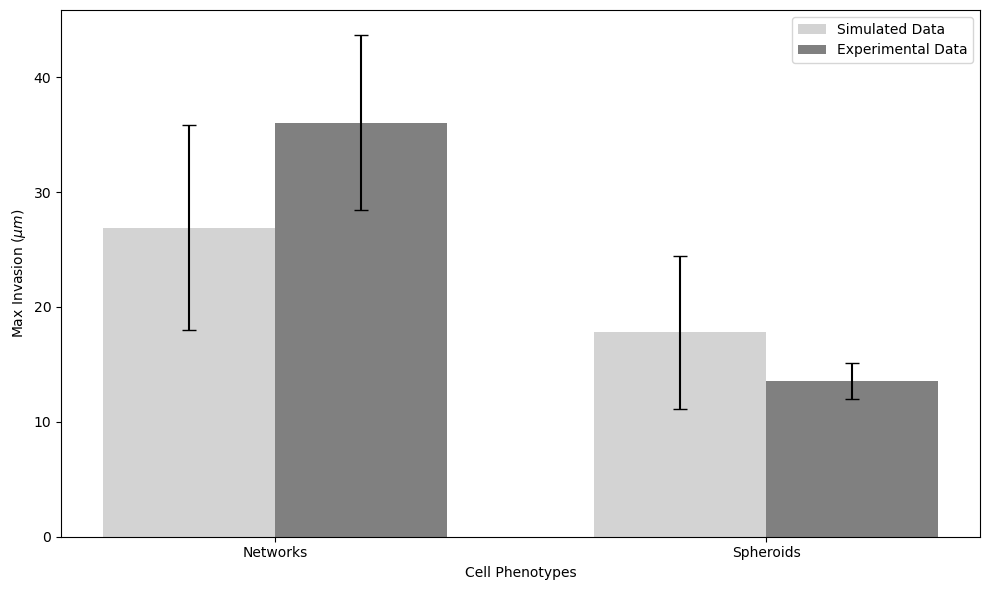

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_cell_invasion(folder_path):
    data_list = []

    # Loop through each CSV file and read the data
    for i in range(1, 21):
        file_path = os.path.join(folder_path, f'celldata{i}.csv')
        data = pd.read_csv(file_path)
        data_list.append(data)

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Convert mcs to hours (1000 mcs = 24 hours, so 1 mcs = 0.024 hours)
    all_data['hours'] = all_data['mcs'] * 0.024

    # Multiply cell_invasion by 2
    all_data['cell_invasion'] *= 2

    # Calculate the mean and standard deviation for cell_invasion at each hour
    stats_data = all_data.groupby('hours')['cell_invasion'].agg(
        mean='mean',
        std='std'
    ).reset_index()

    return stats_data

# Read and process data from both folders
percentile_data_ec = read_and_process_cell_invasion('ecc_data1')
percentile_data_sp = read_and_process_cell_invasion('spp_data')

# Experimental data
labels = ['Networks', 'Spheroids']
experiment_means = [36.03, 13.58]
experiment_errors = [7.63, 1.56]  # Experimental errors for bar plot

# Filter data for 60 hours
data_at_60_hours_ec = percentile_data_ec[percentile_data_ec['hours'] == 60]
data_at_60_hours_sp = percentile_data_sp[percentile_data_sp['hours'] == 60]

# Prepare data for plotting
def prepare_bar_data(data_ec, data_sp):
    means_ec = data_ec['mean'].values[0] if not data_ec.empty else 0
    std_ec = data_ec['std'].values[0] if not data_ec.empty else 0
    means_sp = data_sp['mean'].values[0] if not data_sp.empty else 0
    std_sp = data_sp['std'].values[0] if not data_sp.empty else 0
    return [means_ec, means_sp], [std_ec, std_sp]

# Create bar plot for data at 60 hours
fig, ax = plt.subplots(figsize=(10, 6))

simulated_means_60, simulated_stds_60 = prepare_bar_data(data_at_60_hours_ec, data_at_60_hours_sp)

bar_width = 0.35
index = np.arange(len(labels))

# Bar plot for simulated data
bars_simulated = ax.bar(index - bar_width / 2, simulated_means_60, bar_width, yerr=simulated_stds_60, capsize=5, label='Simulated Data', color='lightgray')

# Bar plot for experimental data
bars_experimental = ax.bar(index + bar_width / 2, experiment_means, bar_width, yerr=experiment_errors, capsize=5, color='grey', label='Experimental Data')

ax.set_xlabel('Cell Phenotypes')
ax.set_ylabel('Max Invasion ($\mu m$)')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.legend()

# Save plot
plt.tight_layout()
plt.savefig('cell_invasion_comparison_60_hours.png', dpi=500, bbox_inches='tight')
plt.show()


## make it color-coded standard deviation

C:\Users\tbenson2\AppData\Local\Temp\ipykernel_15740\328438664.py:26: FutureWarning: The provided callable <function mean at 0x00000185FFEF2840> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  std_data = all_data.groupby('hours')['cell_invasion'].agg(
C:\Users\tbenson2\AppData\Local\Temp\ipykernel_15740\328438664.py:26: FutureWarning: The provided callable <function std at 0x00000185FFEF2980> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  std_data = all_data.groupby('hours')['cell_invasion'].agg(
C:\Users\tbenson2\AppData\Local\Temp\ipykernel_15740\328438664.py:26: FutureWarning: The provided callable <function mean at 0x00000185FFEF2840> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be us

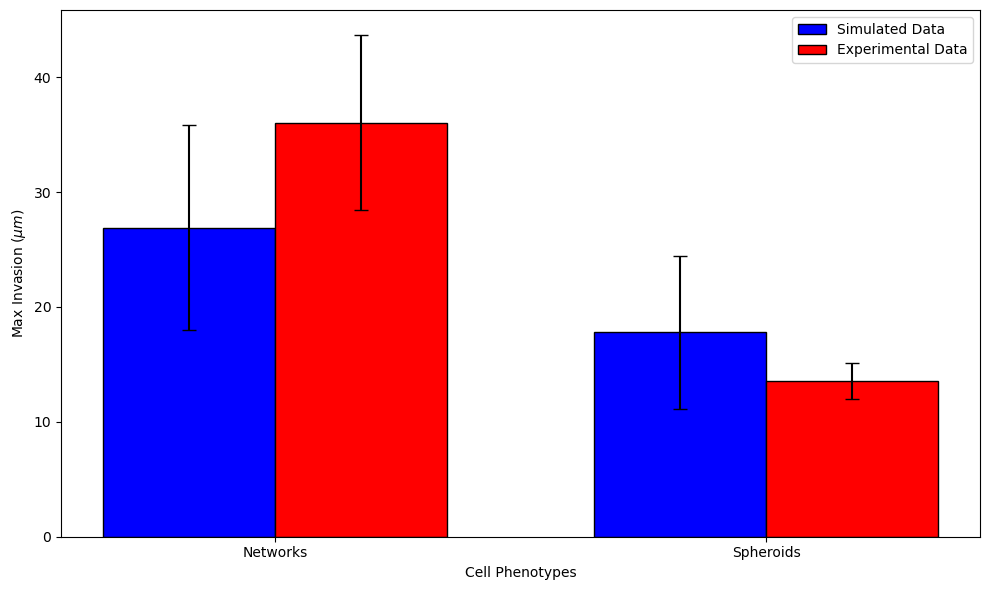

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_cell_invasion(folder_path):
    data_list = []

    # Loop through each CSV file and read the data
    for i in range(1, 21):
        file_path = os.path.join(folder_path, f'celldata{i}.csv')
        data = pd.read_csv(file_path)
        data_list.append(data)

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Convert mcs to hours (1000 mcs = 24 hours, so 1 mcs = 0.024 hours)
    all_data['hours'] = all_data['mcs'] * 0.024

    # Multiply cell_invasion by 2
    all_data['cell_invasion'] *= 2

    # Calculate the mean and standard deviation for cell_invasion at each hour
    std_data = all_data.groupby('hours')['cell_invasion'].agg(
        mean=np.mean,
        std=np.std
    ).reset_index()

    return std_data

# Read and process data from both folders
std_data_ec = read_and_process_cell_invasion('ecc_data1')
std_data_sp = read_and_process_cell_invasion('spp_data')

# Experimental data
labels = ['Networks', 'Spheroids']
experiment_means = [36.03, 13.58]
experiment_errors = [7.63, 1.56]  # These are still experimental errors but will be omitted from the bar plot

# Filter data for 60 hours
data_at_60_hours_ec = std_data_ec[std_data_ec['hours'] == 60]
data_at_60_hours_sp = std_data_sp[std_data_sp['hours'] == 60]

# Prepare data for plotting
def prepare_bar_data(data_ec, data_sp):
    mean_ec = data_ec['mean'].values[0] if not data_ec.empty else 0
    std_ec = data_ec['std'].values[0] if not data_ec.empty else 0
    mean_sp = data_sp['mean'].values[0] if not data_sp.empty else 0
    std_sp = data_sp['std'].values[0] if not data_sp.empty else 0
    return [mean_ec, mean_sp], [std_ec, std_sp]

# Create bar plot for data at 60 hours
fig, ax = plt.subplots(figsize=(10, 6))

simulated_means_60, simulated_stds_60 = prepare_bar_data(data_at_60_hours_ec, data_at_60_hours_sp)

bar_width = 0.35
index = np.arange(len(labels))

# Bar plot for simulated data in blue
bars_simulated = ax.bar(index - bar_width / 2, simulated_means_60, bar_width, 
                        yerr=simulated_stds_60, capsize=5, label='Simulated Data', 
                        color='blue', edgecolor='black')

# Bar plot for experimental data in red
bars_experimental = ax.bar(index + bar_width / 2, experiment_means, bar_width, 
                           yerr=experiment_errors, capsize=5, label='Experimental Data', 
                           color='red', edgecolor='black')

# Adding labels, title, and legend
ax.set_xlabel('Cell Phenotypes')
ax.set_ylabel('Max Invasion ($\mu m$)')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.legend()

# Improve the layout
plt.tight_layout()

# Save the plot
plt.savefig('colored_cell_invasion_comparison_60_hours.png', dpi=500, bbox_inches='tight')

# Display the plot
plt.show()


### Circularity at the end of Day 7

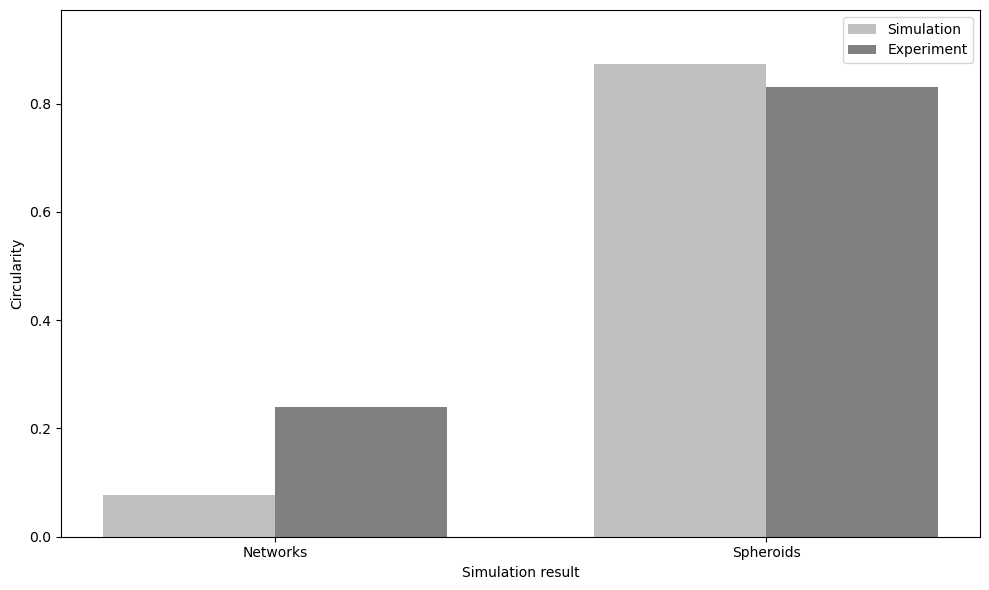

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process circularity data from a given folder
def read_and_process_circularity(folder_path):
    data_list = []

    # Loop through each CSV file and read the data
    for i in range(1, 21):
        file_path = os.path.join(folder_path, f'celldata{i}.csv')
        try:
            data = pd.read_csv(file_path)
            data_list.append(data)
        except FileNotFoundError:
            print(f'File {file_path} not found. Skipping.')
            continue

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Calculate the maximum circularity for each MCS across all replicas
    summary_data = all_data.groupby('mcs')['circularity'].max().reset_index()

    return summary_data

# Read and process circularity data from both folders
summary_data_ec = read_and_process_circularity('ecc_data1')
summary_data_sp = read_and_process_circularity('spp_data')

# Get the maximum circularity at the end of the simulation runs
end_mcs_ec = summary_data_ec['mcs'].max()
end_mcs_sp = summary_data_sp['mcs'].max()

end_circularity_ec = summary_data_ec[summary_data_ec['mcs'] == end_mcs_ec]['circularity'].values[0]
end_circularity_sp = summary_data_sp[summary_data_sp['mcs'] == end_mcs_sp]['circularity'].values[0]

# Experimental data (Replace with your actual experimental data)
experiment_circularity = [0.24, 0.83]

# Prepare data for plotting
labels = ['Networks', 'Spheroids']
circularity_simulation = [end_circularity_ec, end_circularity_sp]

# Create bar plot for circularity
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(labels))

# Bar plot for simulation data
bars_simulation = ax.bar(index - bar_width/2, circularity_simulation, bar_width, label='Simulation', color='silver')

# Bar plot for experimental data
bars_experiment = ax.bar(index + bar_width/2, experiment_circularity, bar_width, label='Experiment', color='gray')

# Add some text for labels, title, and custom x-axis tick labels, etc.
#ax.set_title('Comparison of Circularity at the End of Simulation and Experiment')
ax.set_xlabel('Simulation result')
ax.set_ylabel('Circularity')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.set_ylim(0, max(max(circularity_simulation), max(experiment_circularity)) + 0.1)  # Dynamic y-axis limit

# Add legend
ax.legend()

# Save plot
plt.tight_layout()
plt.savefig('circularity_comparison_simulation_experiment.png', dpi=500, bbox_inches='tight')
plt.show()


Add standard deviation error bar to the circularity plot

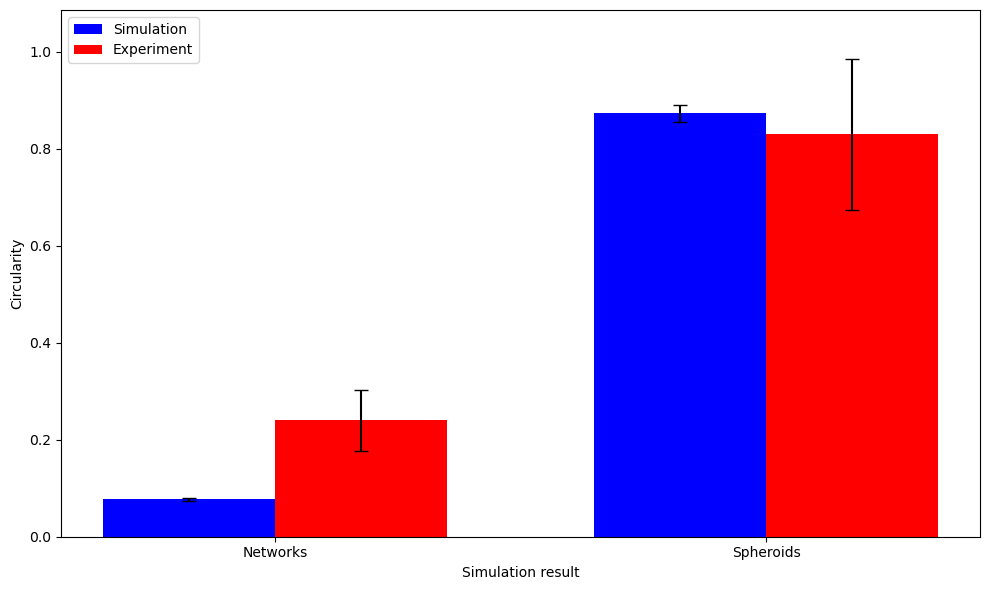

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process circularity data from a given folder
def read_and_process_circularity(folder_path):
    data_list = []

    # Loop through each CSV file and read the data
    for i in range(1, 21):
        file_path = os.path.join(folder_path, f'celldata{i}.csv')
        try:
            data = pd.read_csv(file_path)
            data_list.append(data)
        except FileNotFoundError:
            print(f'File {file_path} not found. Skipping.')
            continue

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Calculate the maximum circularity for each MCS across all replicas
    summary_data = all_data.groupby('mcs')['circularity'].max().reset_index()
    
    # Calculate the standard error for each MCS
    summary_se = all_data.groupby('mcs')['circularity'].sem().reset_index()
    
    return summary_data, summary_se

# Read and process circularity data from both folders
summary_data_ec, summary_se_ec = read_and_process_circularity('ecc_data1')
summary_data_sp, summary_se_sp = read_and_process_circularity('spp_data')

# Define the end MCS for day 7 (7000 MCS)
end_mcs_ec = 7000
end_mcs_sp = 7000

# Get the maximum circularity and its standard error at day 7
end_circularity_ec = summary_data_ec[summary_data_ec['mcs'] == end_mcs_ec]['circularity'].values[0]
end_circularity_sp = summary_data_sp[summary_data_sp['mcs'] == end_mcs_sp]['circularity'].values[0]

se_circularity_ec = summary_se_ec[summary_se_ec['mcs'] == end_mcs_ec]['circularity'].values[0]
se_circularity_sp = summary_se_sp[summary_se_sp['mcs'] == end_mcs_sp]['circularity'].values[0]

# Experimental data and their standard errors
experiment_circularity = [0.24, 0.83]
experiment_errors = [0.063, 0.156]

# Prepare data for plotting
labels = ['Networks', 'Spheroids']
circularity_simulation = [end_circularity_ec, end_circularity_sp]
se_simulation = [se_circularity_ec, se_circularity_sp]

# Create bar plot for circularity
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(labels))

# Bar plot for simulation data with error bars
bars_simulation = ax.bar(index - bar_width/2, circularity_simulation, bar_width, label='Simulation', color='blue', yerr=se_simulation, capsize=5)

# Bar plot for experimental data with error bars
bars_experiment = ax.bar(index + bar_width/2, experiment_circularity, bar_width, label='Experiment', color='red', yerr=experiment_errors, capsize=5)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Simulation result')
ax.set_ylabel('Circularity')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.set_ylim(0, max(max(circularity_simulation) + max(se_simulation), max(experiment_circularity) + max(experiment_errors)) + 0.1)  # Dynamic y-axis limit

# Add legend
ax.legend()

# Save plot
plt.tight_layout()
plt.savefig('circularity_comparison_simulation_experiment.png', dpi=500, bbox_inches='tight')
plt.show()


C:\Users\tbenson2\AppData\Local\Temp\ipykernel_15740\3525259013.py:24: FutureWarning: The provided callable <function mean at 0x00000185FFEF2840> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  summary_data = all_data.groupby('mcs')['circularity'].agg(
C:\Users\tbenson2\AppData\Local\Temp\ipykernel_15740\3525259013.py:24: FutureWarning: The provided callable <function std at 0x00000185FFEF2980> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  summary_data = all_data.groupby('mcs')['circularity'].agg(
C:\Users\tbenson2\AppData\Local\Temp\ipykernel_15740\3525259013.py:24: FutureWarning: The provided callable <function mean at 0x00000185FFEF2840> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be

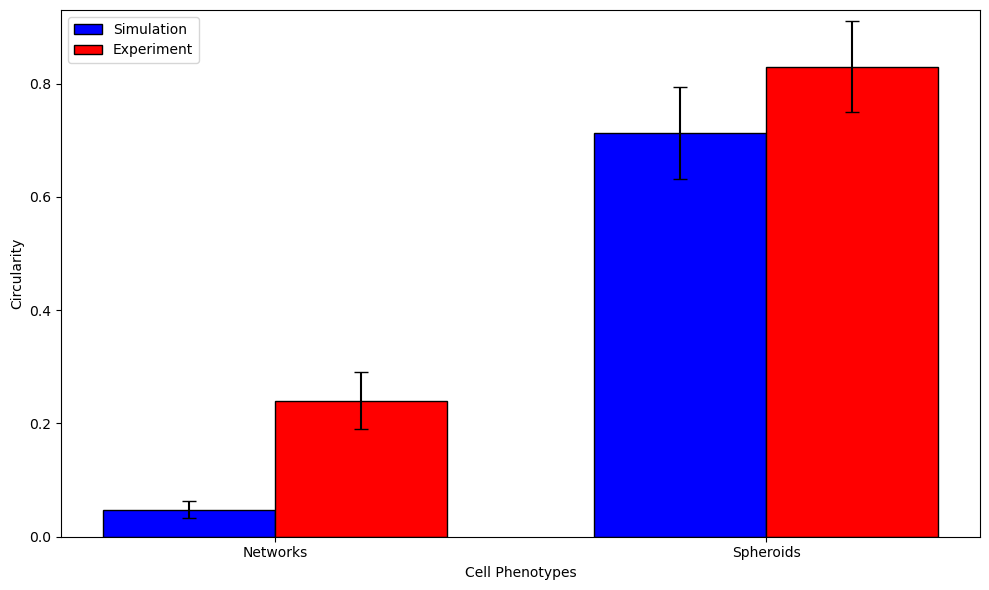

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process circularity data from a given folder
def read_and_process_circularity(folder_path):
    data_list = []

    # Loop through each CSV file and read the data
    for i in range(1, 21):
        file_path = os.path.join(folder_path, f'celldata{i}.csv')
        try:
            data = pd.read_csv(file_path)
            data_list.append(data)
        except FileNotFoundError:
            print(f'File {file_path} not found. Skipping.')
            continue

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Calculate the mean and standard deviation for circularity at the end of each MCS
    summary_data = all_data.groupby('mcs')['circularity'].agg(
        mean=np.mean,
        std=np.std
    ).reset_index()

    return summary_data

# Read and process circularity data from both folders
summary_data_ec = read_and_process_circularity('ecc_data1')
summary_data_sp = read_and_process_circularity('spp_data')

# Get the maximum MCS value for each dataset
end_mcs_ec = summary_data_ec['mcs'].max()
end_mcs_sp = summary_data_sp['mcs'].max()

# Get mean and standard deviation of circularity at the end of the simulation
end_circularity_ec_mean = summary_data_ec[summary_data_ec['mcs'] == end_mcs_ec]['mean'].values[0]
end_circularity_ec_std = summary_data_ec[summary_data_ec['mcs'] == end_mcs_ec]['std'].values[0]
end_circularity_sp_mean = summary_data_sp[summary_data_sp['mcs'] == end_mcs_sp]['mean'].values[0]
end_circularity_sp_std = summary_data_sp[summary_data_sp['mcs'] == end_mcs_sp]['std'].values[0]

# Experimental data (Replace with your actual experimental data)
experiment_circularity = [0.24, 0.83]
experiment_errors = [0.05, 0.08]  # Example experimental standard deviations

# Prepare data for plotting
labels = ['Networks', 'Spheroids']
circularity_simulation_means = [end_circularity_ec_mean, end_circularity_sp_mean]
circularity_simulation_stds = [end_circularity_ec_std, end_circularity_sp_std]

# Create bar plot for circularity with error bars
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(labels))

# Bar plot for simulation data in blue with error bars
bars_simulation = ax.bar(index - bar_width/2, circularity_simulation_means, bar_width, 
                         yerr=circularity_simulation_stds, capsize=5, label='Simulation', 
                         color='blue', edgecolor='black')

# Bar plot for experimental data in red with error bars
bars_experiment = ax.bar(index + bar_width/2, experiment_circularity, bar_width, 
                         yerr=experiment_errors, capsize=5, label='Experiment', 
                         color='red', edgecolor='black')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Cell Phenotypes')
ax.set_ylabel('Circularity')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.set_ylim(0, max(max(circularity_simulation_means), max(experiment_circularity)) + 0.1)  # Dynamic y-axis limit

# Add legend
ax.legend()

# Save plot
plt.tight_layout()
plt.savefig('colored_circularity_comparison_simulation_experiment.png', dpi=500, bbox_inches='tight')

# Display the plot
plt.show()


#### Trying different color mix

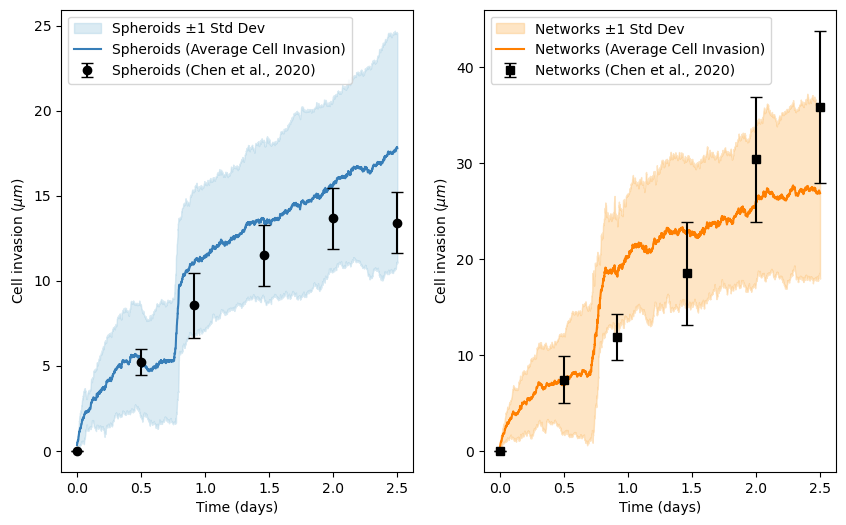

In [16]:
import warnings
warnings.filterwarnings('ignore')


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_data(folder_path):
    data_list = []

    # Loop through each CSV file and read the data
    # We have 20 replicas for summary statistics and named each celldata1, celldata2,..., celldata20
    for i in range(1, 21):
        file_path = os.path.join(folder_path, f'celldata{i}.csv')
        data = pd.read_csv(file_path)
        data_list.append(data)

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Convert MCS to days (1000 mcs = 1 day) based on experimental setup
    all_data['days'] = all_data['mcs'] / 1000

    # Multiply cell_invasion by 2 to convert back to the experimental value
    # each cell is 2 μm for 1 pixel in simulation
    all_data['cell_invasion'] *= 2

    # Filter data to include only the first 2.5 days/60 hrs to match experiment
    filtered_data = all_data[all_data['days'] <= 2.5]

    # Calculate the average and standard deviation for circularity and cell_invasion for each day
    summary_data = filtered_data.groupby('days').agg({
        'circularity': ['mean', 'std'],
        'cell_invasion': ['mean', 'std']
    }).reset_index()

    # Flatten the column names for clarity
    summary_data.columns = ['days', 'circularity_mean', 'circularity_std', 'cell_invasion_mean', 'cell_invasion_std']

    return summary_data

# Read and process data from both folders
summary_data_ec = read_and_process_data('ecc_data1')
summary_data_sp = read_and_process_data('spp_data')

# Experimental data (converted from hours to days)
network_days = [0, 12, 22, 35, 48, 60]  # in hours
network_days = [x / 24 for x in network_days]  # convert to days
network_conc = [0, 7.41, 11.88, 18.53, 30.42, 35.91]  # Added origin point
network_error = [0, 2.43, 2.43, 5.37, 6.52, 7.92]  # Added origin point

spheroid_days = [0, 12, 22, 35, 48, 60]  # in hours
spheroid_days = [x / 24 for x in spheroid_days]  # convert to days
spheroid_conc = [0, 5.24, 8.56, 11.50, 13.67, 13.42]  # Added origin point
spheroid_error = [0, 0.77, 1.92, 1.79, 1.79, 1.79]  # Added origin point

# Plotting of the images
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Define color-blind friendly colors
spheroid_color = '#377eb8'  # Blue
spheroid_fill_color = '#a6cee3'  # Light Blue
network_color = '#ff7f00'  # Orange
network_fill_color = '#fdbf6f'  # Light Orange

# Plot cell_invasion with standard deviation error for spheroid
ax[0].fill_between(summary_data_sp['days'], 
                   summary_data_sp['cell_invasion_mean'] - summary_data_sp['cell_invasion_std'], 
                   summary_data_sp['cell_invasion_mean'] + summary_data_sp['cell_invasion_std'], 
                   color=spheroid_fill_color, alpha=0.4, label='Spheroids ±1 Std Dev')
ax[0].plot(summary_data_sp['days'], summary_data_sp['cell_invasion_mean'], label='Spheroids (Average Cell Invasion)', color=spheroid_color)
ax[0].errorbar(spheroid_days, spheroid_conc, yerr=spheroid_error, color='black', fmt='o', marker='o', capsize=4, label='Spheroids (Chen et al., 2020)')
ax[0].set_xlabel('Time (days)')
ax[0].set_ylabel('Cell invasion ($ \mu m$)')
ax[0].legend(loc=2)

# Plot cell_invasion with standard deviation error for network
ax[1].fill_between(summary_data_ec['days'], 
                   summary_data_ec['cell_invasion_mean'] - summary_data_ec['cell_invasion_std'], 
                   summary_data_ec['cell_invasion_mean'] + summary_data_ec['cell_invasion_std'], 
                   color=network_fill_color, alpha=0.4, label='Networks ±1 Std Dev')
ax[1].plot(summary_data_ec['days'], summary_data_ec['cell_invasion_mean'], label='Networks (Average Cell Invasion)', color=network_color)
ax[1].errorbar(network_days, network_conc, yerr=network_error, color='black', fmt='s', marker='s', capsize=4, label='Networks (Chen et al., 2020)')
ax[1].set_xlabel('Time (days)')
ax[1].set_ylabel('Cell invasion ($ \mu m$)')
ax[1].legend()

plt.savefig("cell_invasion_dynamics_combined_std.png", dpi=500, bbox_inches="tight")
plt.show();


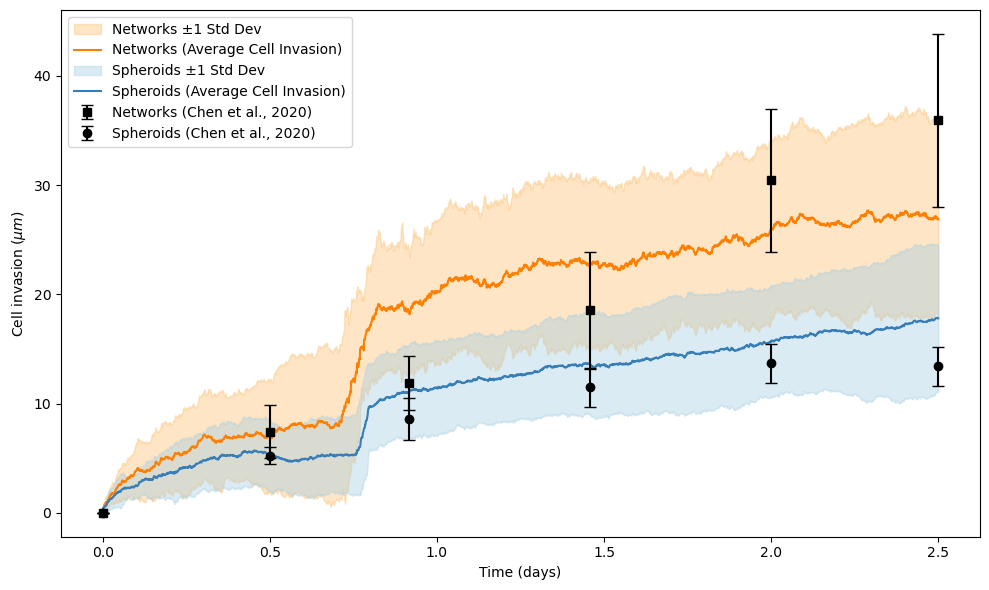

In [17]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(figsize=(10, 6))

# Define color-blind friendly colors
spheroid_color = '#377eb8'  # Blue
spheroid_fill_color = '#a6cee3'  # Light Blue
network_color = '#ff7f00'  # Orange
network_fill_color = '#fdbf6f'  # Light Orange

# Fill between ±1 standard deviation for Networks
ax1.fill_between(summary_data_ec['days'], 
                 summary_data_ec['cell_invasion_mean'] - summary_data_ec['cell_invasion_std'], 
                 summary_data_ec['cell_invasion_mean'] + summary_data_ec['cell_invasion_std'], 
                 color=network_fill_color, alpha=0.4, label='Networks ±1 Std Dev')

# Plot the average cell invasion for Networks
ax1.plot(summary_data_ec['days'], summary_data_ec['cell_invasion_mean'], 
         label='Networks (Average Cell Invasion)', color=network_color)

# Fill between ±1 standard deviation for Spheroids
ax1.fill_between(summary_data_sp['days'], 
                 summary_data_sp['cell_invasion_mean'] - summary_data_sp['cell_invasion_std'], 
                 summary_data_sp['cell_invasion_mean'] + summary_data_sp['cell_invasion_std'], 
                 color=spheroid_fill_color, alpha=0.4, label='Spheroids ±1 Std Dev')

# Plot the average cell invasion for Spheroids
ax1.plot(summary_data_sp['days'], summary_data_sp['cell_invasion_mean'], 
         label='Spheroids (Average Cell Invasion)', color=spheroid_color)

# Add error bars for the experimental data with distinct markers
ax1.errorbar(network_days, network_conc, yerr=network_error, color='black', fmt='s', marker='s', capsize=4, label='Networks (Chen et al., 2020)')
ax1.errorbar(spheroid_days, spheroid_conc, yerr=spheroid_error, color='black', fmt='o', marker='o', capsize=4, label='Spheroids (Chen et al., 2020)')

# Set plot labels and legend
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Cell invasion ($ \mu m$)')
ax1.legend()
plt.tight_layout()

# Save the figure
plt.savefig('cell_invasion_combined_plot_net_sphe_std.png', dpi=300, bbox_inches='tight')
plt.show()

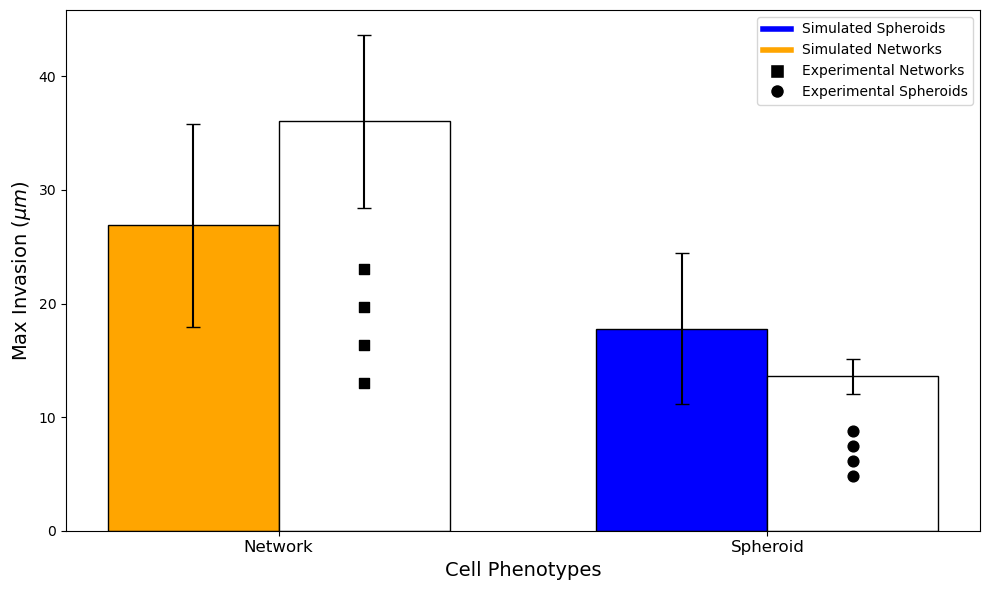

In [18]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process data from a given folder
def read_and_process_cell_invasion(folder_path):
    data_list = []

    # Loop through each CSV file and read the data
    for i in range(1, 21):
        file_path = os.path.join(folder_path, f'celldata{i}.csv')
        data = pd.read_csv(file_path)
        data_list.append(data)

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Convert mcs to hours (1000 mcs = 24 hours, so 1 mcs = 0.024 hours)
    all_data['hours'] = all_data['mcs'] * 0.024

    # Multiply cell_invasion by 2
    all_data['cell_invasion'] *= 2

    # Calculate the mean and standard deviation for cell_invasion at each hour
    std_data = all_data.groupby('hours')['cell_invasion'].agg(
        mean=np.mean,
        std=np.std
    ).reset_index()

    return std_data

# Read and process data from both folders
std_data_ec = read_and_process_cell_invasion('ecc_data1')
std_data_sp = read_and_process_cell_invasion('spp_data')

# Experimental data
labels = ['Network', 'Spheroid']
experiment_means = [36.03, 13.58]
experiment_errors = [7.63, 1.56]  # Experimental errors for the bars

# Filter data for 60 hours
data_at_60_hours_ec = std_data_ec[std_data_ec['hours'] == 60]
data_at_60_hours_sp = std_data_sp[std_data_sp['hours'] == 60]

# Prepare data for plotting
def prepare_bar_data(data_ec, data_sp):
    mean_ec = data_ec['mean'].values[0] if not data_ec.empty else 0
    std_ec = data_ec['std'].values[0] if not data_ec.empty else 0
    mean_sp = data_sp['mean'].values[0] if not data_sp.empty else 0
    std_sp = data_sp['std'].values[0] if not data_sp.empty else 0
    return [mean_ec, mean_sp], [std_ec, std_sp]

# Create bar plot for data at 60 hours
fig, ax = plt.subplots(figsize=(10, 6))

simulated_means_60, simulated_stds_60 = prepare_bar_data(data_at_60_hours_ec, data_at_60_hours_sp)

bar_width = 0.35
index = np.arange(len(labels))

# Bar plot for simulated data in blue (Spheroid) and orange (Network)
bars_simulated = ax.bar(index - bar_width / 2, simulated_means_60, bar_width, 
                        yerr=simulated_stds_60, capsize=5, label='Simulated Data', 
                        color=['orange', 'blue'], edgecolor='black')

# Bar plot for experimental data in white with black edge
bars_experimental = ax.bar(index + bar_width / 2, experiment_means, bar_width, 
                           yerr=experiment_errors, capsize=5, label='Experimental Data', 
                           color='white', edgecolor='black')

# Overlay 4 vertical squares and circles inside the experimental bars
# Experimental Network (Squares)
network_x_position = index[0] + bar_width / 2  # Center position in Network bar
network_y_center = experiment_means[0] / 2  # Center vertically in the bar
network_y_values = np.linspace(network_y_center - 5, network_y_center + 5, 4)  # Vertically spaced
ax.scatter([network_x_position] * 4, network_y_values, color='black', marker='s', s=60, zorder=3)

# Experimental Spheroid (Circles)
spheroid_x_position = index[1] + bar_width / 2  # Center position in Spheroid bar
spheroid_y_center = experiment_means[1] / 2  # Center vertically in the bar
spheroid_y_values = np.linspace(spheroid_y_center - 2, spheroid_y_center + 2, 4)  # Vertically spaced
ax.scatter([spheroid_x_position] * 4, spheroid_y_values, color='black', marker='o', s=60, zorder=3)

# Set labels, title, and legend
ax.set_xlabel('Cell Phenotypes', fontsize=14)
ax.set_ylabel('Max Invasion ($\mu m$)', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(labels, fontsize=12)

# Custom legend for clarity
legend_labels = [
    'Simulated Spheroids',
    'Simulated Networks',
    'Experimental Networks',
    'Experimental Spheroids'
]


# legend_labels = [
#     'Simulated Spheroids',
#     'Simulated Networks',
#     'Experimental Networks',
#     'Experimental Spheroids'
# ]

legend_markers = [
    plt.Line2D([0], [0], color='blue', lw=4),
    plt.Line2D([0], [0], color='orange', lw=4),
    plt.Line2D([0], [0], color='white', marker='s', markerfacecolor='black', markersize=10),
    plt.Line2D([0], [0], color='white', marker='o', markerfacecolor='black', markersize=10)
]

ax.legend(legend_markers, legend_labels, fontsize=10)

# Improve the layout
plt.tight_layout()

# Save the plot
plt.savefig('centered_markers_cell_invasion_comparison_60_hours.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

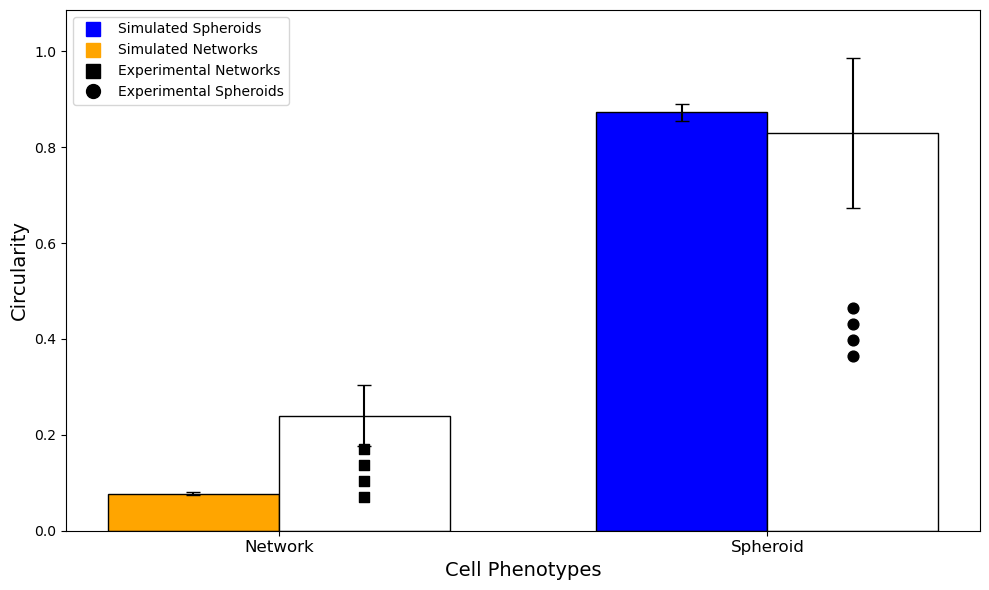

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read and process circularity data from a given folder
def read_and_process_circularity(folder_path):
    data_list = []

    # Loop through each CSV file and read the data
    for i in range(1, 21):
        file_path = os.path.join(folder_path, f'celldata{i}.csv')
        try:
            data = pd.read_csv(file_path)
            data_list.append(data)
        except FileNotFoundError:
            print(f'File {file_path} not found. Skipping.')
            continue

    # Concatenate all data into a single DataFrame
    all_data = pd.concat(data_list, ignore_index=True)

    # Calculate the maximum circularity for each MCS across all replicas
    summary_data = all_data.groupby('mcs')['circularity'].max().reset_index()
    
    # Calculate the standard error for each MCS
    summary_se = all_data.groupby('mcs')['circularity'].sem().reset_index()
    
    return summary_data, summary_se

# Read and process circularity data from both folders
summary_data_ec, summary_se_ec = read_and_process_circularity('ecc_data1')
summary_data_sp, summary_se_sp = read_and_process_circularity('spp_data')

# Define the end MCS for day 7 (7000 MCS)
end_mcs_ec = 7000
end_mcs_sp = 7000

# Get the maximum circularity and its standard error at day 7
end_circularity_ec = summary_data_ec[summary_data_ec['mcs'] == end_mcs_ec]['circularity'].values[0]
end_circularity_sp = summary_data_sp[summary_data_sp['mcs'] == end_mcs_sp]['circularity'].values[0]

se_circularity_ec = summary_se_ec[summary_se_ec['mcs'] == end_mcs_ec]['circularity'].values[0]
se_circularity_sp = summary_se_sp[summary_se_sp['mcs'] == end_mcs_sp]['circularity'].values[0]

# Experimental data and their standard errors
experiment_circularity = [0.24, 0.83]
experiment_errors = [0.063, 0.156]

# Prepare data for plotting
labels = ['Network', 'Spheroid']
circularity_simulation = [end_circularity_ec, end_circularity_sp]
se_simulation = [se_circularity_ec, se_circularity_sp]

# Create bar plot for circularity
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(labels))

# Bar plot for simulation data in blue and orange with black edges
bars_simulation = ax.bar(index - bar_width/2, circularity_simulation, bar_width, label='Simulation', 
                         color=['orange', 'blue'], edgecolor='black', yerr=se_simulation, capsize=5)

# Bar plot for experimental data in white with black edges
bars_experiment = ax.bar(index + bar_width/2, experiment_circularity, bar_width, label='Experiment', 
                         color='white', edgecolor='black', yerr=experiment_errors, capsize=5)

# Overlay 4 vertical squares and circles inside the experimental bars
# Experimental Network (Squares)
network_x_position = index[0] + bar_width / 2  # Center position in Network bar
network_y_center = experiment_circularity[0] / 2  # Center vertically in the bar
network_y_values = np.linspace(network_y_center - 0.05, network_y_center + 0.05, 4)  # Vertically spaced
ax.scatter([network_x_position] * 4, network_y_values, color='black', marker='s', s=60, zorder=3)

# Experimental Spheroid (Circles)
spheroid_x_position = index[1] + bar_width / 2  # Center position in Spheroid bar
spheroid_y_center = experiment_circularity[1] / 2  # Center vertically in the bar
spheroid_y_values = np.linspace(spheroid_y_center - 0.05, spheroid_y_center + 0.05, 4)  # Vertically spaced
ax.scatter([spheroid_x_position] * 4, spheroid_y_values, color='black', marker='o', s=60, zorder=3)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Cell Phenotypes', fontsize=14)
ax.set_ylabel('Circularity', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylim(0, max(max(circularity_simulation) + max(se_simulation), max(experiment_circularity) + max(experiment_errors)) + 0.1)  # Dynamic y-axis limit

# Custom legend for clarity
legend_labels = [
    'Simulated Spheroids',
    'Simulated Networks',
    'Experimental Networks',
    'Experimental Spheroids'
]
legend_elements = [
    plt.Line2D([0], [0], color='blue', marker='s', markersize=10, label='Simulated Spheroids', linestyle='None'),
    plt.Line2D([0], [0], color='orange', marker='s', markersize=10, label='Simulated Networks', linestyle='None'),
    plt.Line2D([0], [0], color='black', marker='s', markersize=10, label='Experimental Networks', linestyle='None'),
    plt.Line2D([0], [0], color='black', marker='o', markersize=10, label='Experimental Spheroids', linestyle='None')
]

ax.legend(handles=legend_elements, fontsize=10)

# Save plot
plt.tight_layout()
plt.savefig('centered_markers_circularity_comparison_with_black_edges.png', dpi=300, bbox_inches='tight')
plt.show()